## Load libraries

In [1]:
import specpy.mtspec as mtspec
import specpy.utils as utils
import specpy.mtcross as mtcross
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

## Load Mesetas network data

In [2]:
#data = np.loadtxt('../data/sgc_mesetas.dat')
data = np.loadtxt('../data/mesetas_src.dat')
dt   = 1/100.
npts,ntr = np.shape(data)

ptime = np.ones(ntr)
ptime[0:ntr+1:4] = 14.
ptime[1:ntr+1:4] = 24.
ptime[2:ntr+1:4] = 5.5
ptime[3:ntr+1:4] = 20.5
ptime[11*4-1:11*4+4] = ptime[11*4-1:11*4+4]-2. 
ptime[20] = 13.4

print('npts, # of traces, dt ',npts, ntr, dt)

npts, # of traces, dt  10001 76 0.01


# Plot time series

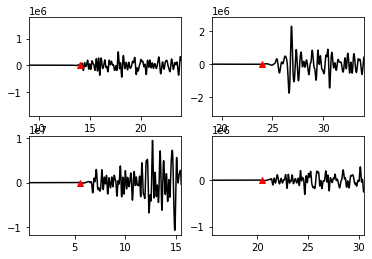

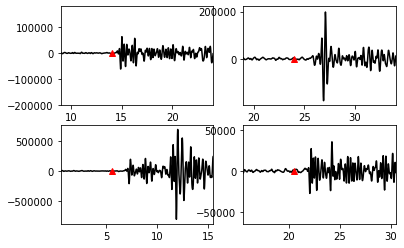

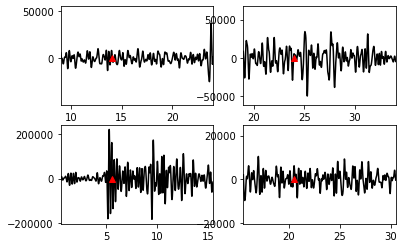

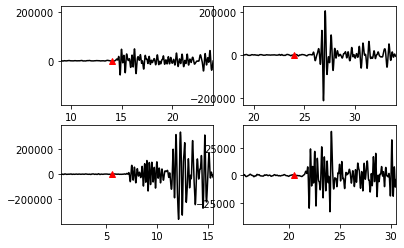

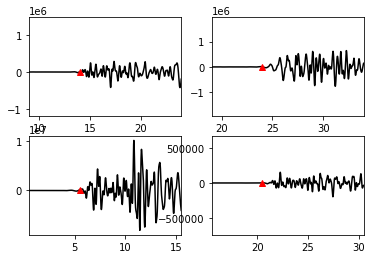

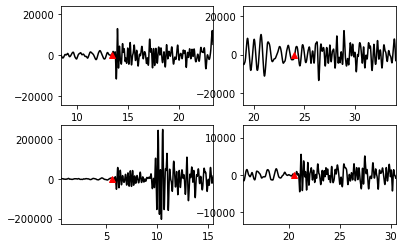

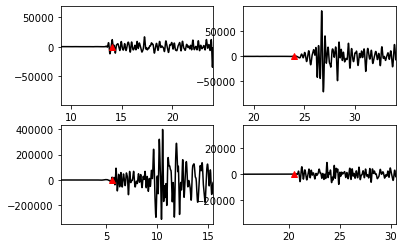

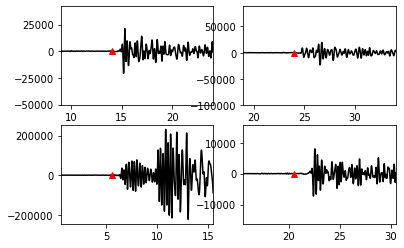

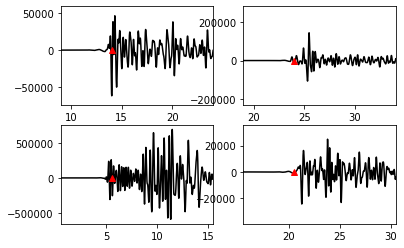

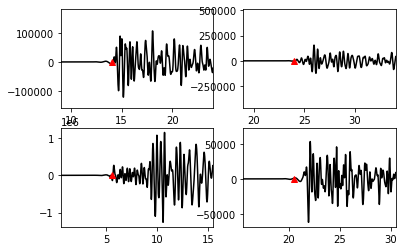

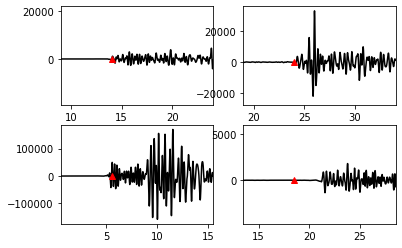

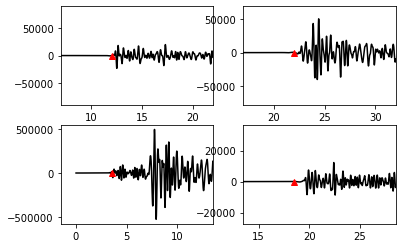

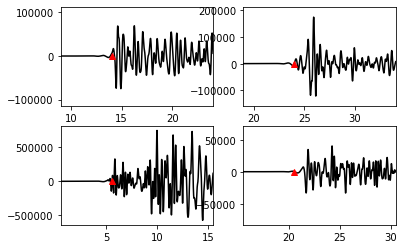

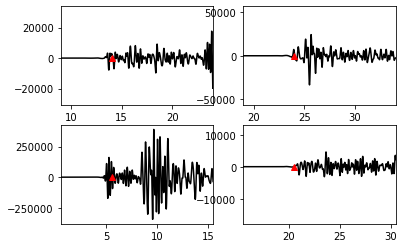

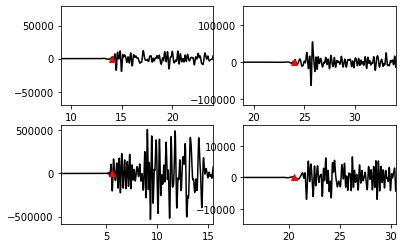

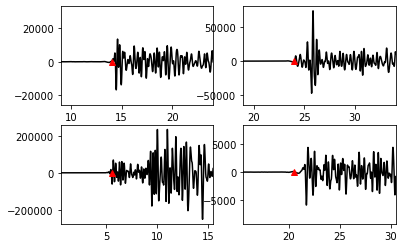

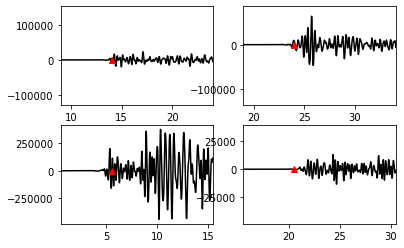

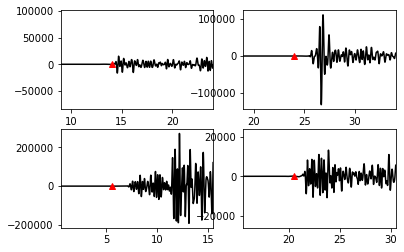

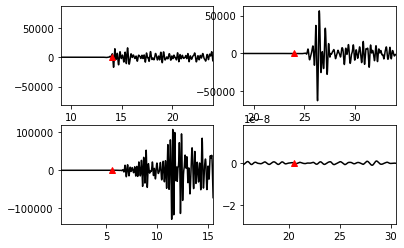

In [95]:
# create time vector
qtime = 0   # in seconds
t    = np.arange(npts)*dt - qtime

#------------------------------------
# define filter
#------------------------------------
fmin = 1.0
fmax = 5.
fnyq = 0.5/dt
wn   = [fmin/fnyq,fmax/fnyq]
b, a = signal.butter(4, wn,'bandpass')

#fig = plt.figure()
#ax  = fig.add_subplot()
pcnt = 0
for i in range(0,ntr,):   #range(ntr):
    y = data[:,i]
    x = signal.filtfilt(b, a, y)
    if (pcnt==0):
        fig = plt.figure()
    pcnt = pcnt +1
    ax  = fig.add_subplot(2,2,pcnt)
    ax.plot(t,x,'k')#/(np.max(data[:,i]))+i,'k')
    ax.plot(ptime[i],0,'r^')
    ax.set_xlim(0, 80)
    ax.set_xlim(ptime[i]-5, ptime[i]+10)
    if (pcnt==4):
        pcnt = 0

## Select a single trace for now

14.0 14.0 840
8.4
107591080.61332381 107591.08061332381
107617095.33057745 107617.09533057745


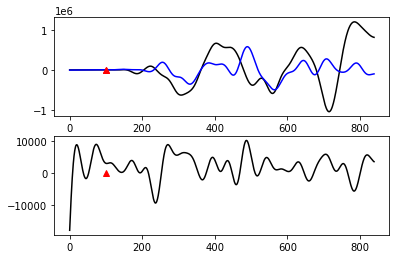

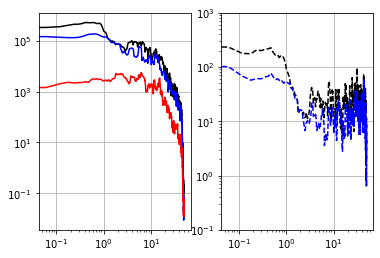

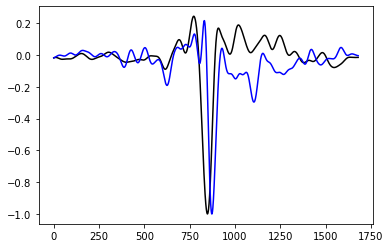

In [92]:
isrc = 0
itr1 =  0+isrc
itr2 = 16+isrc
itr3 = 44+isrc

pmin = min(ptime[itr1],ptime[itr2],ptime[itr3])
nlen = int(round((pmin*0.7)/dt))

ib1 = int(round((ptime[itr1]-1.5)/dt))
ib2 = int(round((ptime[itr2]-1.5)/dt))

ie1 = ib1 + nlen
ie2 = ib2 + nlen

print(ptime[itr1],ptime[itr2],nlen)

y1 = data[ib1:ie1,itr1]
y2 = data[ib2:ie2,itr2]
y3 = data[ib2:ie2,itr3]
x1 = signal.filtfilt(b, a, y1)
x2 = signal.filtfilt(b, a, y2)
x3 = signal.filtfilt(b, a, y3)

print(len(y1)*dt)
nw    = 4.0
kspec = 6

# Get MTSPEC class
Py1   = mtspec.mtspec(y1,nw,kspec,dt)
Py2   = mtspec.mtspec(y2,nw,kspec,dt)
Py3   = mtspec.mtspec(y3,nw,kspec,dt)

Pspec = [Py1, Py2]
Pspec.append(Py3)

Pspec2 = [Py1, Py2, Py3]

# Get positive frequencies
freq ,spec1   = Py1.rspec()
freq ,spec2   = Py2.rspec()
freq ,spec3   = Py3.rspec()

# Get spectral ratio
sratio1 = np.sqrt(spec1/spec3)
sratio2 = np.sqrt(spec2/spec3)

# Get deconvolved source
fmax = 2.
fnyq = 0.5/dt
wn   = [fmax/fnyq]
b, a = signal.butter(4, wn,'lowpass')

P13  = mtcross.mtcross(Py1,Py3,wl=0.001)
xcorr, dcohe, dconv  = P13.mt_corr()
dconv13 = signal.filtfilt(b, a, dconv[:,0])
P23  = mtcross.mtcross(Py2,Py3,wl=0.001)
xcorr, dcohe, dconv2  = P23.mt_corr()
dconv23 = signal.filtfilt(b, a, dconv2[:,0])

fig = plt.figure()
ax  = fig.add_subplot(2,1,1)
ax.plot(x1,'k')
ax.plot(1/dt,0,'r^')
ax.plot(x2,'b')
ax.plot(1/dt,0,'r^')

ax  = fig.add_subplot(2,1,2)
ax.plot(x3,'k')
ax.plot(1/dt,0,'r^')

fig = plt.figure()
ax  = fig.add_subplot(1,2,1)
ax.loglog(freq,np.sqrt(spec1),'k')
ax.loglog(freq,np.sqrt(spec2),'b')
ax.loglog(freq,np.sqrt(spec3),'r')
ax.grid()
ax  = fig.add_subplot(1,2,2)
ax.loglog(freq,sratio1,'k--')
ax.loglog(freq,sratio2,'b--')
#ax.loglog(freq,np.abs(P13.trf[0:len(freq)]),'k')
#ax.loglog(freq,np.abs(P23.trf[0:len(freq)]),'b')
ax.set_ylim(1e-1,1e3)
ax.grid()

fig = plt.figure()
ax  = fig.add_subplot(1,1,1)
ax.plot(dconv13/np.max(np.abs(dconv13)),'k')
ax.plot(dconv23/np.max(np.abs(dconv23)),'b')


## Power spectrum and spectral ratio

In [93]:
print(type(Pspec))
print(Pspec)

<class 'list'>
[<specpy.mtspec.mtspec object at 0x7fa3ad1504d0>, <specpy.mtspec.mtspec object at 0x7fa3acff0550>, <specpy.mtspec.mtspec object at 0x7fa3c9a904d0>]
